In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Specify the File Path
file_path = 'C:\\Users\\USER\\Downloads\\Salary_Data.csv'

# Load File 
data = pd.read_csv(file_path)

# A quick view
data.keys()

Index(['YearsExperience', 'Salary'], dtype='object')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

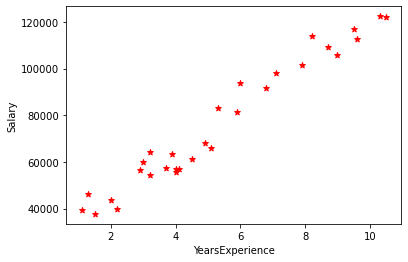

In [6]:
x = data["YearsExperience"]
y = data["Salary"]

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(x, y, color="red", marker="*")
plt.show()

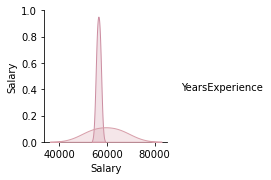

In [7]:
# pairplot

sns.pairplot(data,
             vars=['Salary'],
            hue ='YearsExperience')
plt.show()

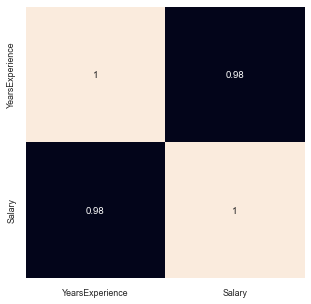

In [8]:
#상관 관계 행렬
data_corr=data.corr()

#heatmap
plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [9]:
#Set x and y values
y=data.YearsExperience.values
x_df=data.drop('YearsExperience',axis=1)
#normalization
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

In [10]:
# train/test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

#DT
clf_dt = DecisionTreeRegressor()
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print(clf_dt.score(x_train, y_train))

1.0


In [14]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.8514693182963202


In [15]:
from sklearn.ensemble import RandomForestRegressor

#RF
rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)

pred_rf = rf_clf.predict(x_test)

print(rf_clf.score(x_train, y_train))

0.9780745755333043


In [16]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.629820410910917


In [17]:
from sklearn.linear_model import LinearRegression

#LR
clf_lr = LinearRegression()
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print(clf_lr.score(x_train, y_train))

0.9395413526983523


In [18]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.5113608850143903


In [19]:
from sklearn.svm import SVR

#SVM
clf_svm = SVR()
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print(clf_svm.score(x_train, y_train))

0.8827797290000218


In [20]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.24430757705046
